In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

In [2]:
df = pd.read_csv('../test_dataset/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [43]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [14]:
# Count duplicated rows in the DataFrame
print(sum(df.duplicated()))

0


In [15]:
# Count occurrences of each unique value in the 'DoctorInCharge' 
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [16]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Initial Data Exploration Summary</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The dataset contains a total of <strong>2,149 observations</strong>.</li>
        <li>All values in the dataset are <strong>non-null</strong> and <strong>numerical</strong>.</li>
        <li>There are <strong>no duplicate</strong> records.</li>
        <li>After removing the `DoctorInCharge` and `PatientID` columns, the dataset consists of <strong>33 features</strong>.</li>
    </ul>
</div>

In [17]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

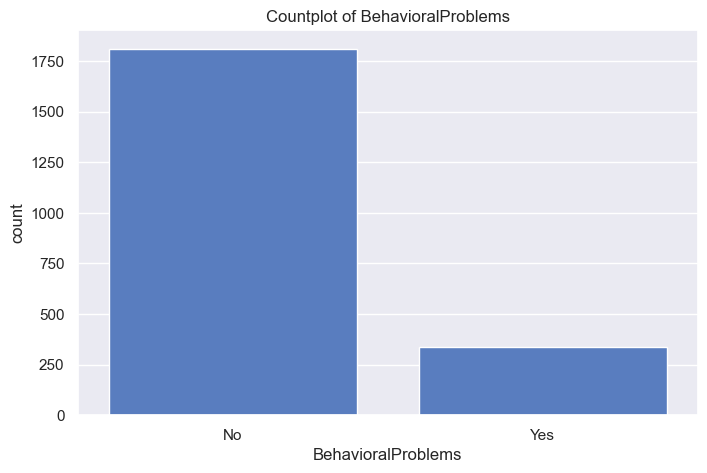

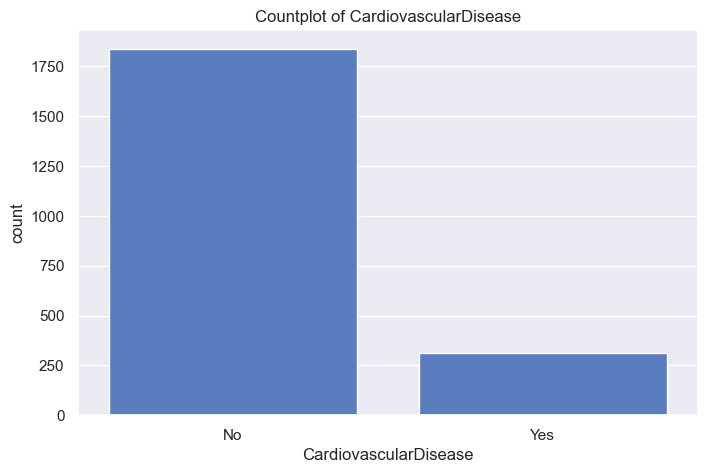

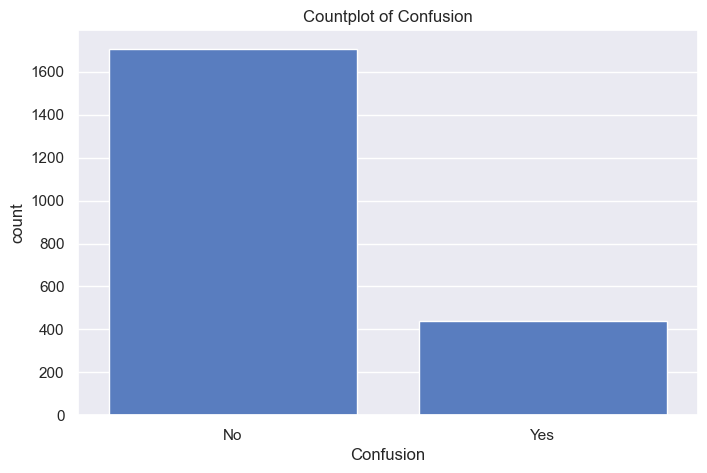

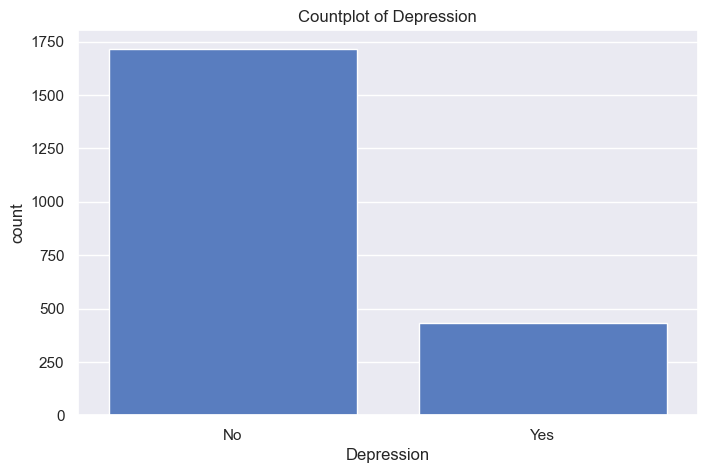

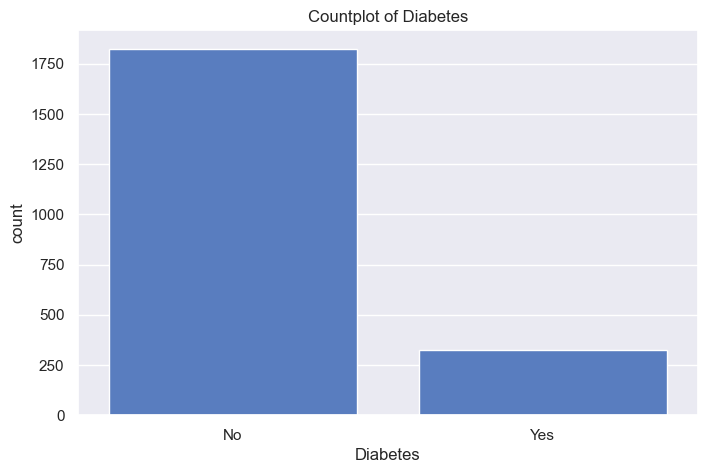

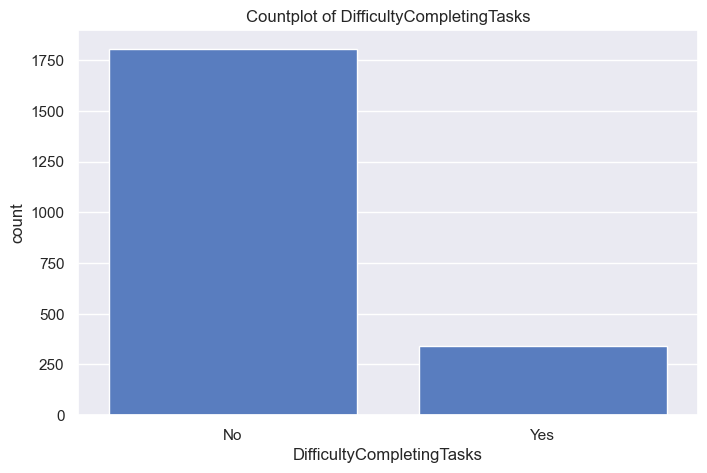

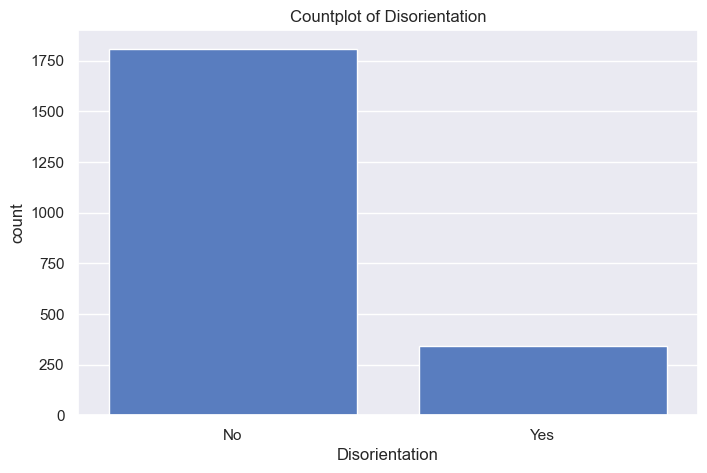

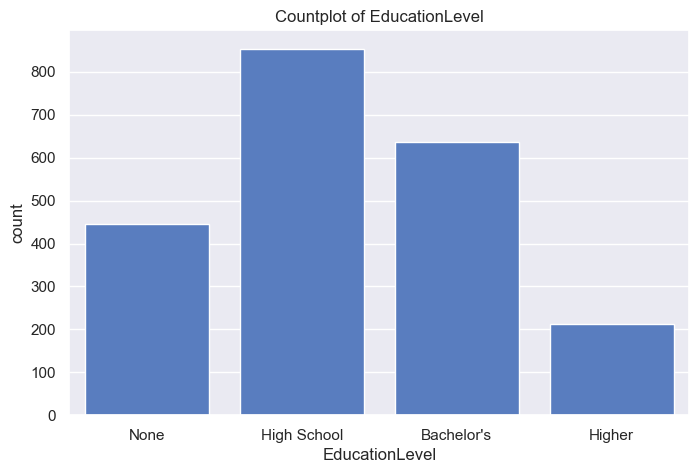

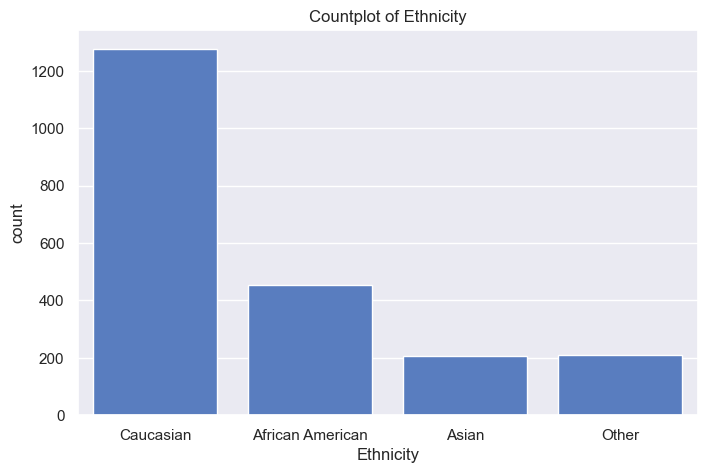

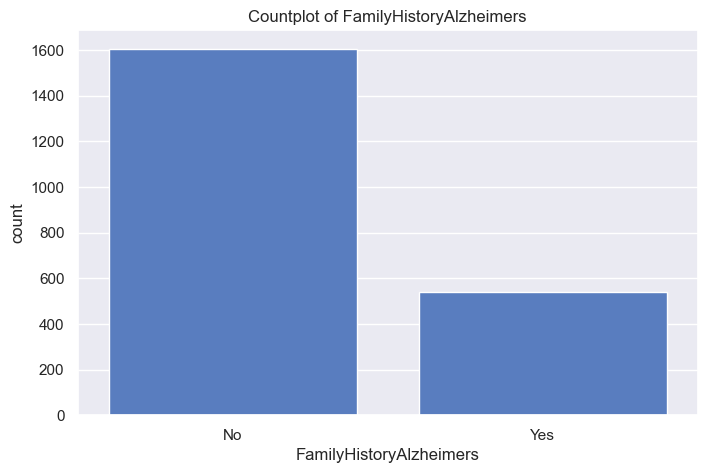

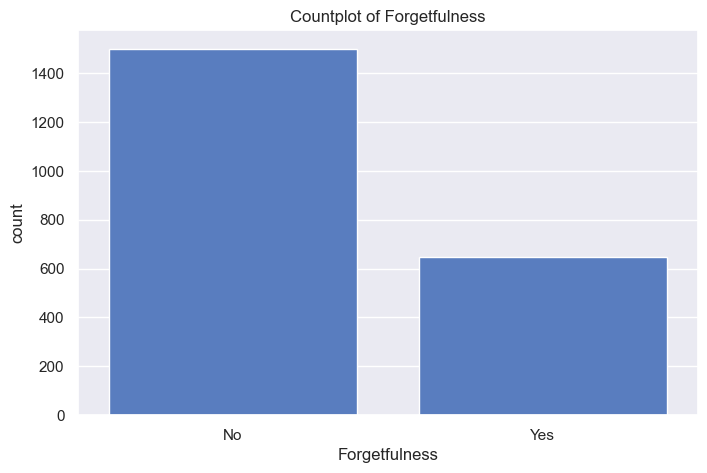

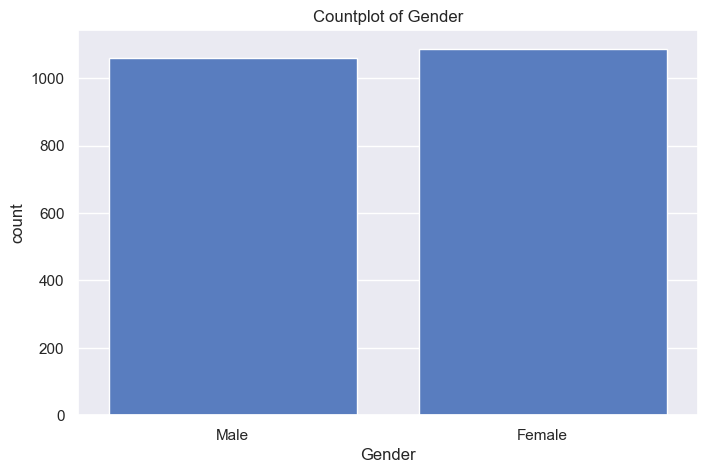

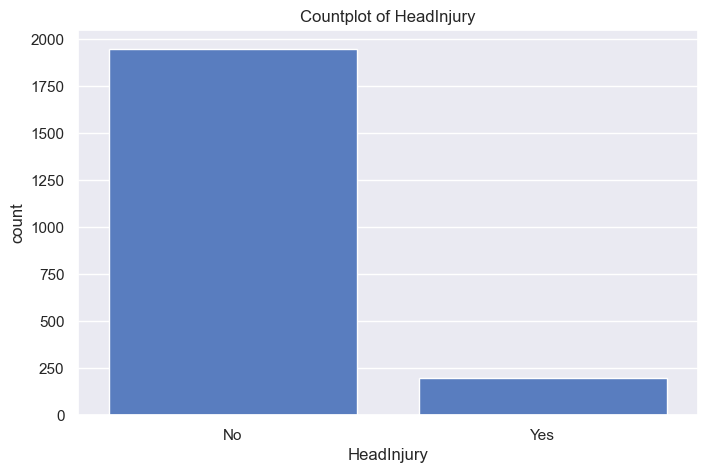

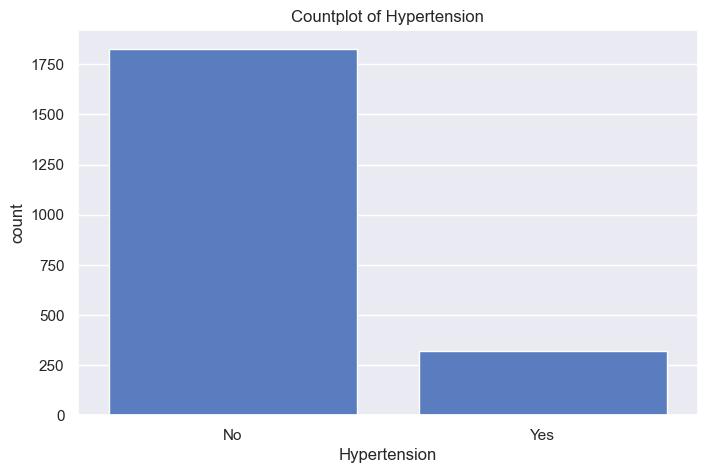

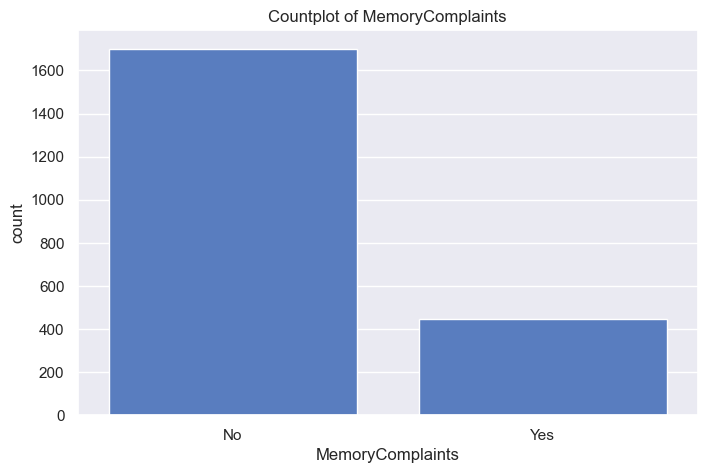

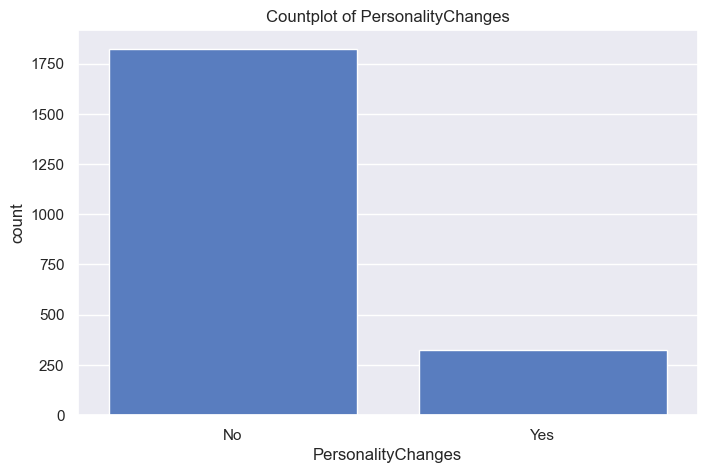

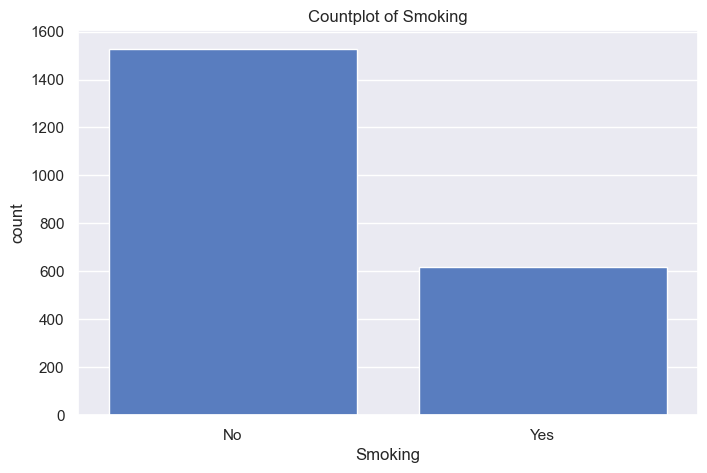

In [18]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observations from Visualization of Categorical Features</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Overall, the dataset predominantly consists of individuals <strong>without disease or health problems</strong>.</li>
        <li><strong>Caucasian</strong>. The most represented demographic is</li>
        <li><strong>High school</strong> graduates constitute the largest educational group, closely followed by individuals with a <strong>bachelor's</strong> degree.</li>
        <li>Notably, both <strong>females</strong> and <strong>males</strong> are equally represented across the dataset.</li>
    </ul>
</div>

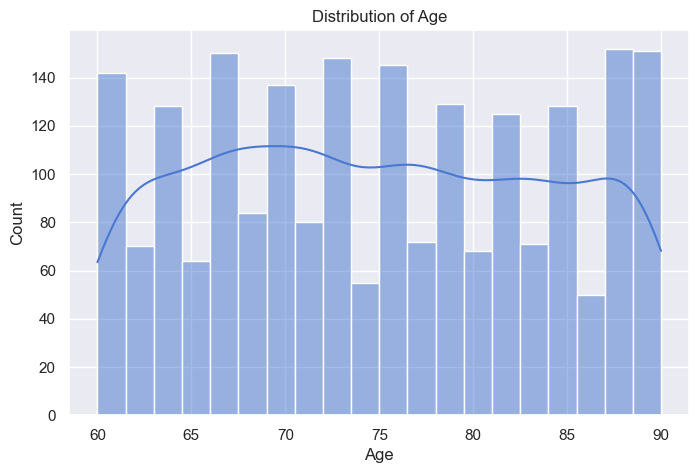

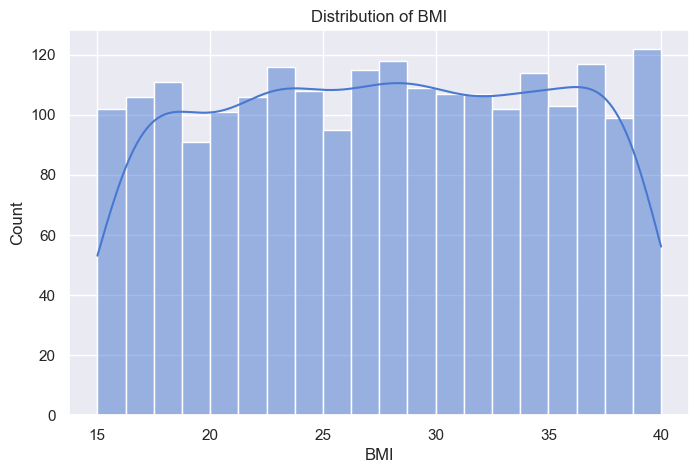

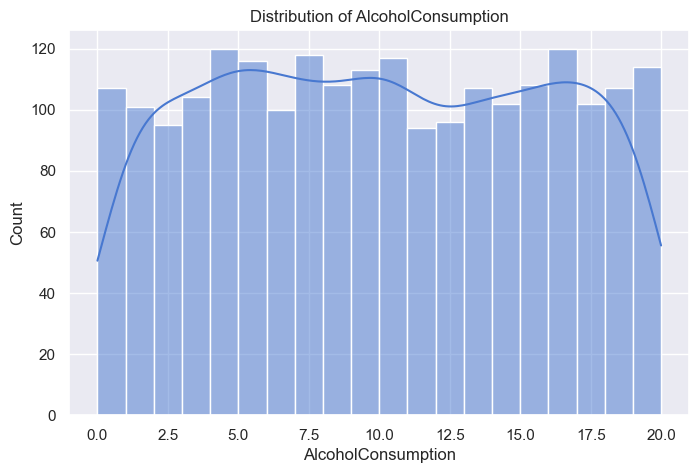

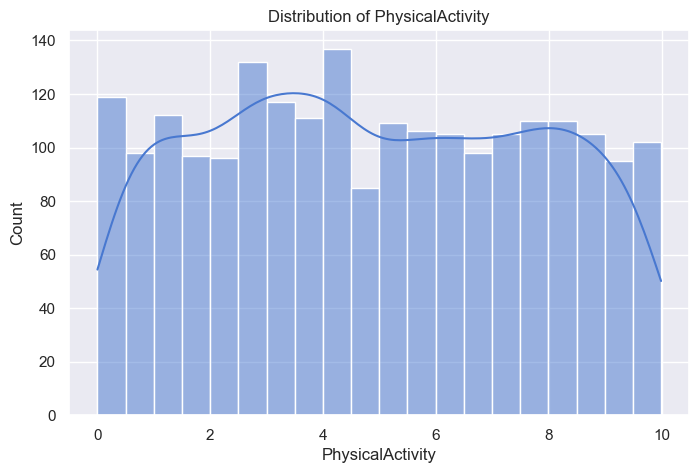

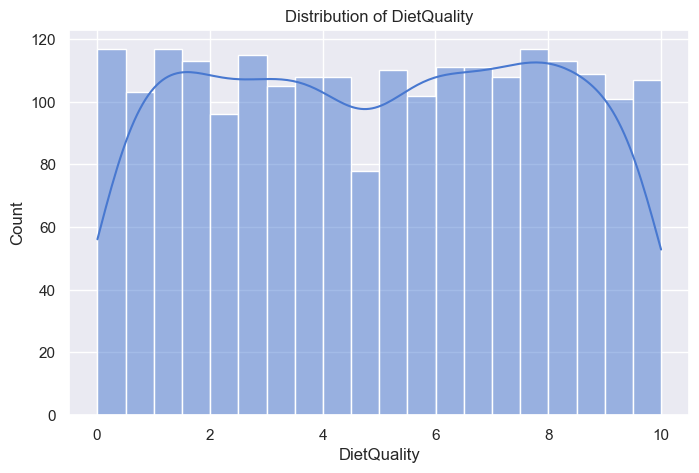

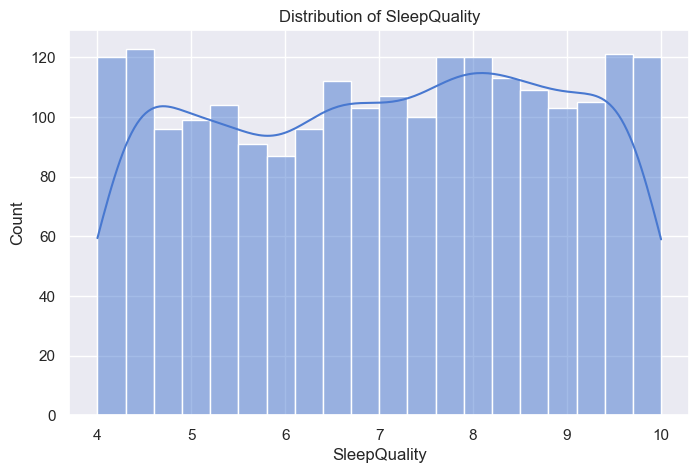

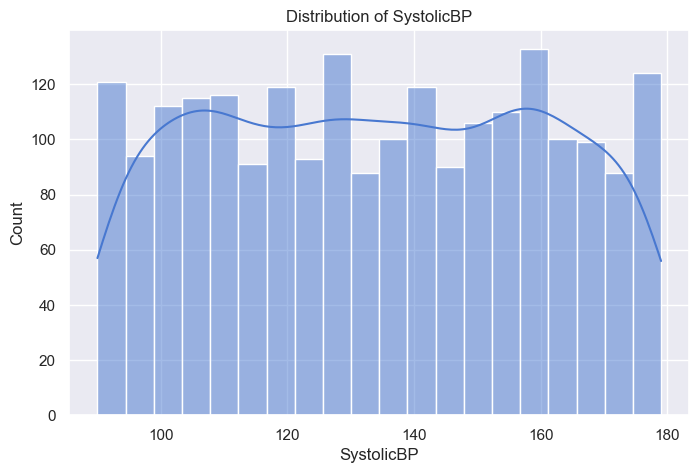

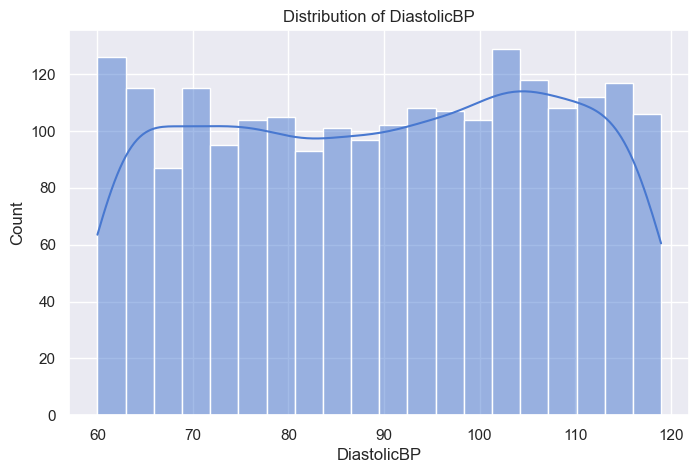

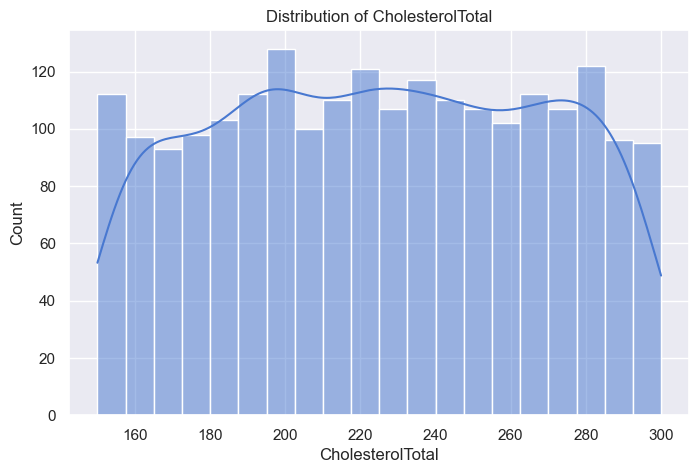

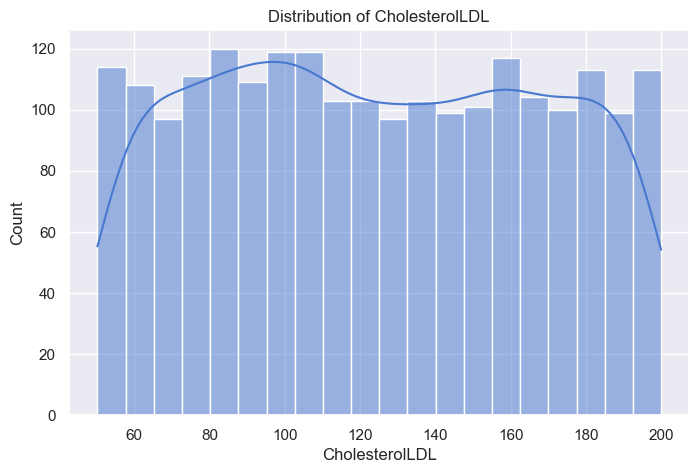

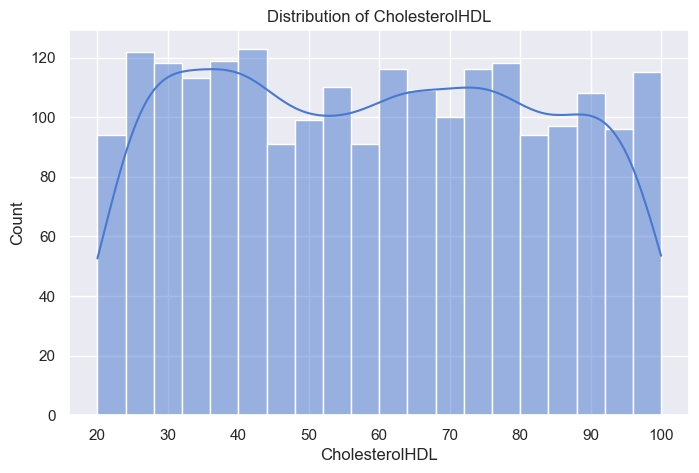

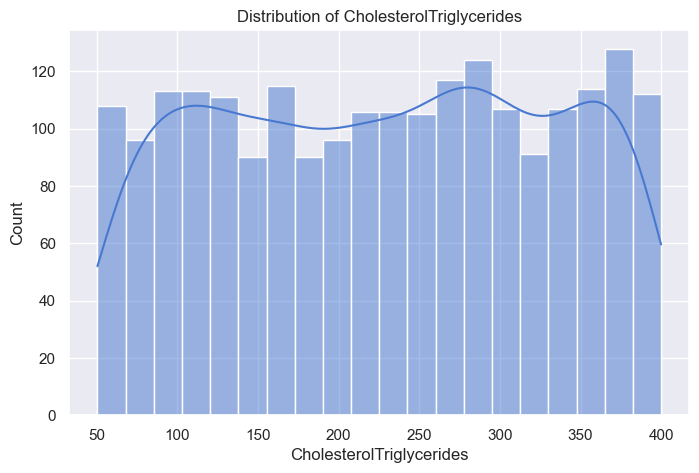

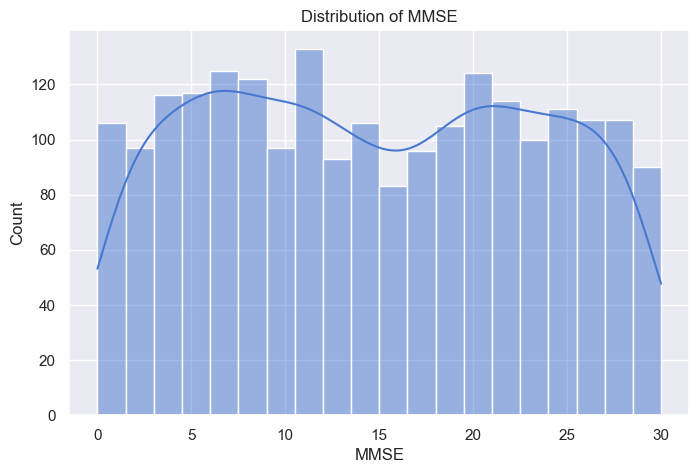

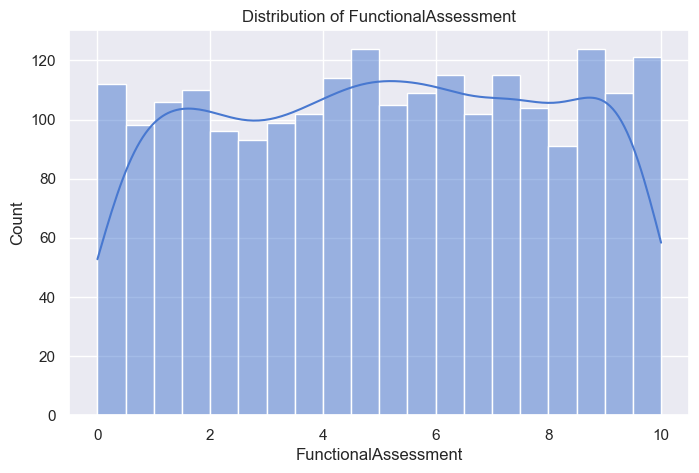

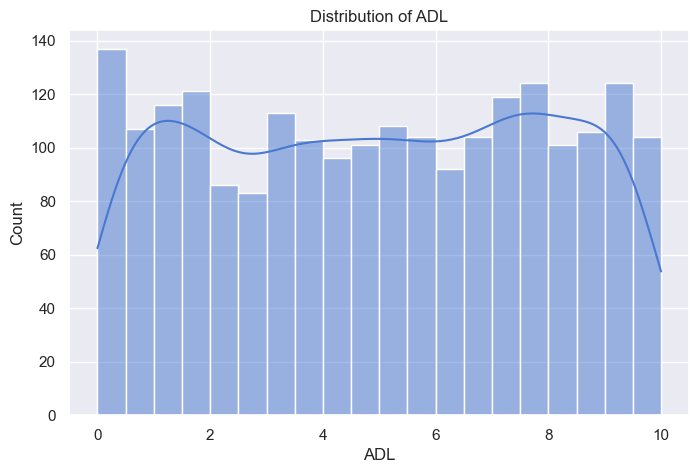

In [15]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observations from Visualization of Numerical Features</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Most of the columns show a <strong>fairly uniform</strong> distribution. </li>
        <li>The `MMSE` (Mini-Mental State Examination) scores appear to follow a <strong>bimodal</strong> distribution, indicating two distinct groups within the data.</li>
    </ul>
</div>

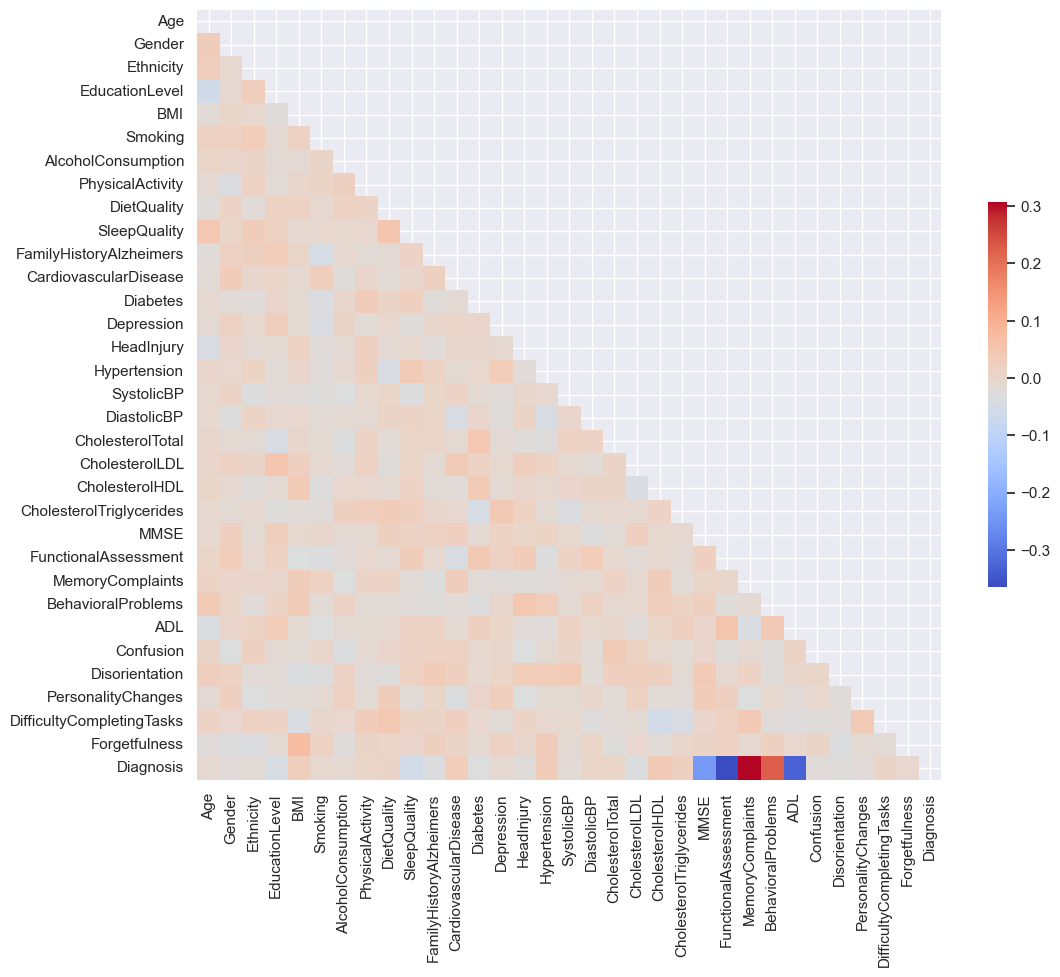

In [16]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

The heatmap reveals that the features do not have any strong correlations among themselves. However, there are five columns that show a correlation **with the target variable**. 

Let's calculate `Pearson correlation coefficient`, also known as `Pearson's r`. It is a measure of the linear relationship between two variables. It quantifies the degree to which a pair of variables are linearly related, ranging from -1 to 1.

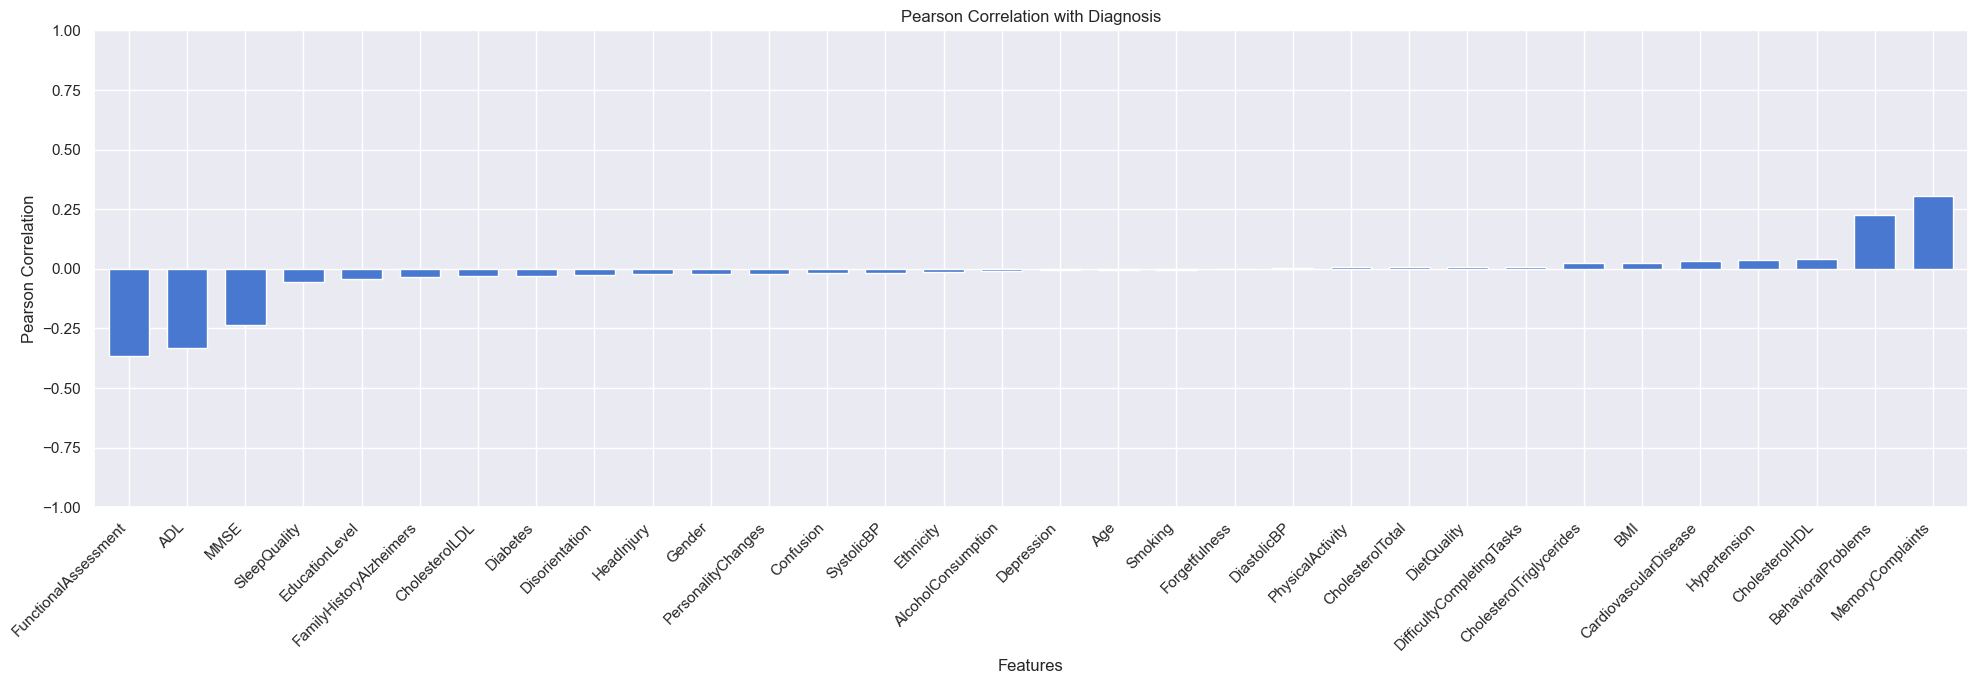

In [17]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

And now let's plot the distribution of the most correlated columns across different 'Diagnosis' categories. 

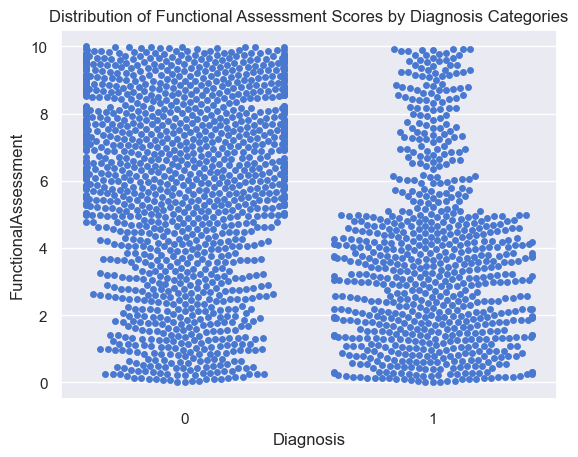

In [18]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')        
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

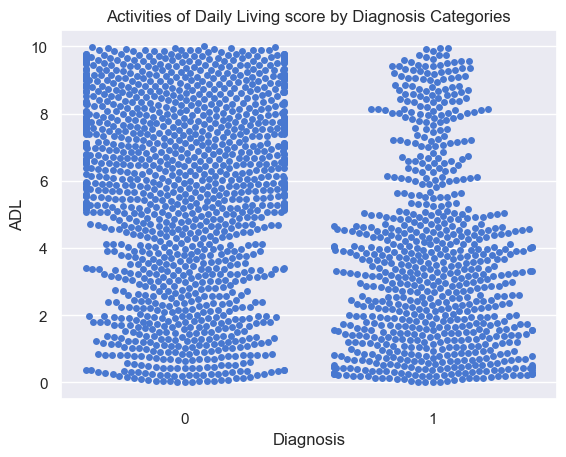

In [19]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')        
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

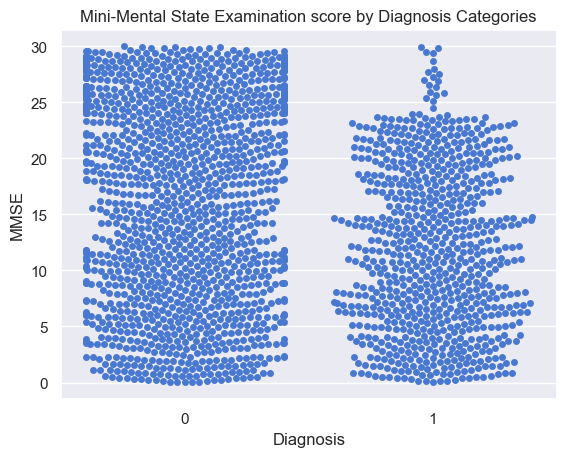

In [20]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')        
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

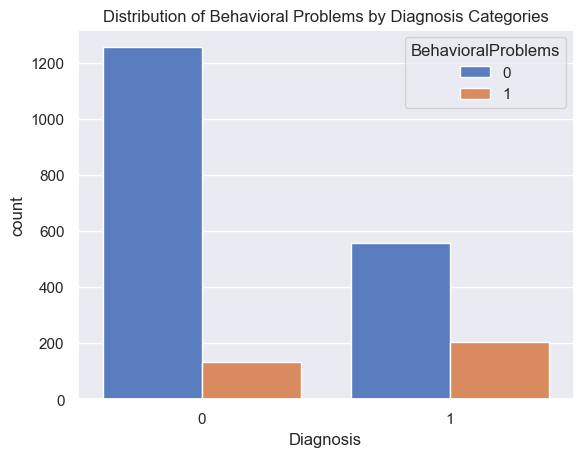

In [21]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

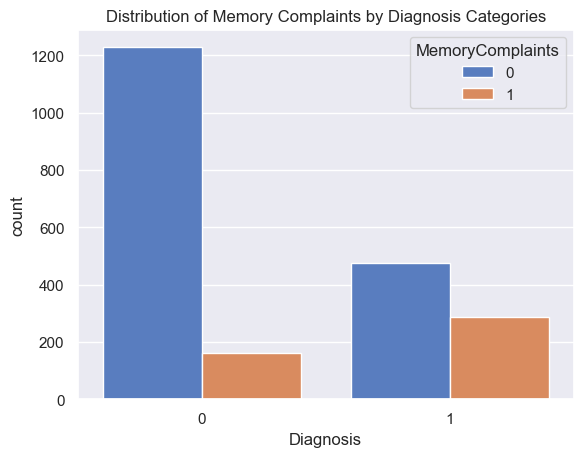

In [22]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observations from Exploring Correlations</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>As observed, there are five columns correlated with the target variable.</li>
        <li>Three numerical features—`Functional Assessment`, `ADL` (Activities of Daily Living), and `MMSE` (Mini-Mental State Examination)—are <strong>negatively</strong> correlated with the `diagnosis of Alzheimer's disease`, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis.</li>
        <li>Additionally, two categorical variables—`Behavioral Problems` and `Memory Complaints`—are <strong>positively</strong> correlated with the `diagnosis`, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process.</li>
    </ul>
</div>

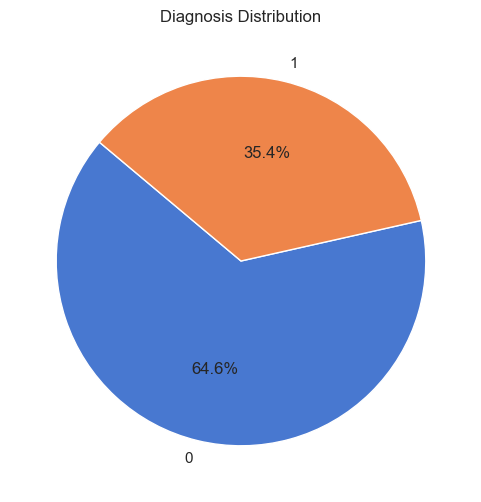

In [23]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observation from the Target Distribution</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Our target variable is <strong>moderately imbalanced</strong>, with 65% of instances being 0 and 35% being 1.</li>
    </ul>
</div>

In [24]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [25]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [19]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [20]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


In [21]:
from sklearn.metrics import classification_report, roc_auc_score


In [22]:
#split data into features and target
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print("Best Parameters:", grid_search.best_params_)

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f"AUC: {auc:.4f}")
        


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.92      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 5}
AUC: 0.9276

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': None, 'n_estimators': 200}
AUC: 0.9507

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       277
 

In [23]:
best_params = {'iterations': 100, 'learning_rate': 0.01}
best_model = CatBoostClassifier(**best_params, verbose=0)

best_model.fit(X_train, y_train)

y_proba = best_model.predict_proba(X_test)[:, 1]

def categorize_risk(p):
    if p < 0.3:
        return "Low Risk"
    elif p < 0.7:
        return "Moderate Risk"
    else:
        return "High Risk"

risk_levels = [categorize_risk(p) for p in y_proba]

results = pd.DataFrame({
    "PatientID": X_test.index,
    "Predicted_Probability": y_proba,
    "RiskLevel": risk_levels,
    "ActualDiagnosis": y_test.values
})

print(results.head(10))


results_sorted = results.sort_values(by="Predicted_Probability", ascending=False)
print("\nTop 10 High-Risk Patients:")
print(results_sorted.head(10))


df_high_risk = df.loc[results[results['RiskLevel'] == 'High Risk'].index]
df_high_risk.describe().T



   PatientID  Predicted_Probability  RiskLevel  ActualDiagnosis
0       1159               0.095959   Low Risk                0
1       1822               0.146000   Low Risk                0
2        978               0.180404   Low Risk                0
3        759               0.125307   Low Risk                0
4        874               0.158711   Low Risk                0
5        109               0.112199   Low Risk                0
6       1177               0.951064  High Risk                1
7        259               0.164949   Low Risk                0
8       1697               0.122692   Low Risk                0
9        479               0.948739  High Risk                1

Top 10 High-Risk Patients:
     PatientID  Predicted_Probability  RiskLevel  ActualDiagnosis
182        909               0.953561  High Risk                1
375         49               0.952793  High Risk                1
160       2133               0.952578  High Risk                1
409 

,count,mean,std,min,25%,50%,75%,max
Age,134.0,0.040868,1.001311,-1.658721,-0.768658,0.121405,0.983654,1.679015
Gender,134.0,0.597015,0.492338,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,134.0,0.791045,1.048268,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,134.0,1.388060,0.949162,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,134.0,0.023004,1.006110,-1.748946,-0.790055,0.022017,0.921590,1.698981
Smoking,134.0,0.283582,0.452428,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,134.0,0.267248,1.064997,-1.709597,-0.703817,0.372683,1.226104,1.727518
PhysicalActivity,134.0,0.204741,0.995172,-1.698449,-0.613954,0.202387,1.112561,1.773086
DietQuality,134.0,0.154859,0.939809,-1.712323,-0.572664,0.252481,0.954180,1.646182
SleepQuality,134.0,0.046958,1.064926,-1.725533,-0.911725,0.264869,1.007625,1.664757


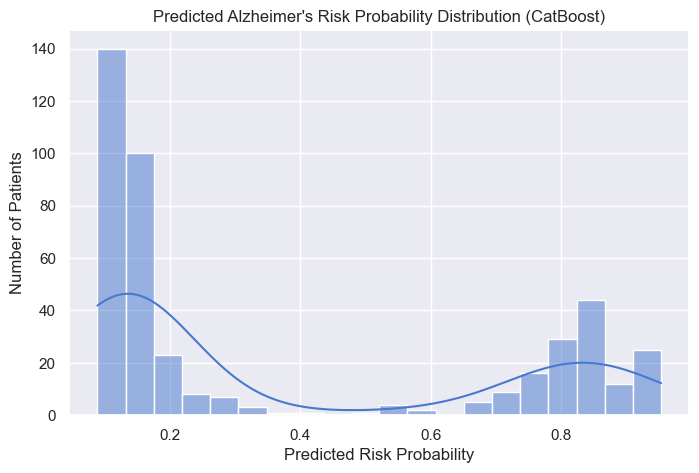

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(y_proba, bins=20, kde=True)
plt.title("Predicted Alzheimer's Risk Probability Distribution (CatBoost)")
plt.xlabel("Predicted Risk Probability")
plt.ylabel("Number of Patients")
plt.show()


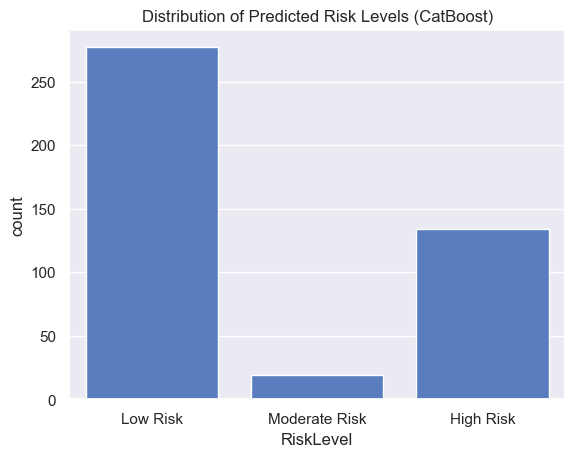

In [25]:
sns.countplot(data=results, x="RiskLevel", order=["Low Risk", "Moderate Risk", "High Risk"])
plt.title("Distribution of Predicted Risk Levels (CatBoost)")
plt.show()


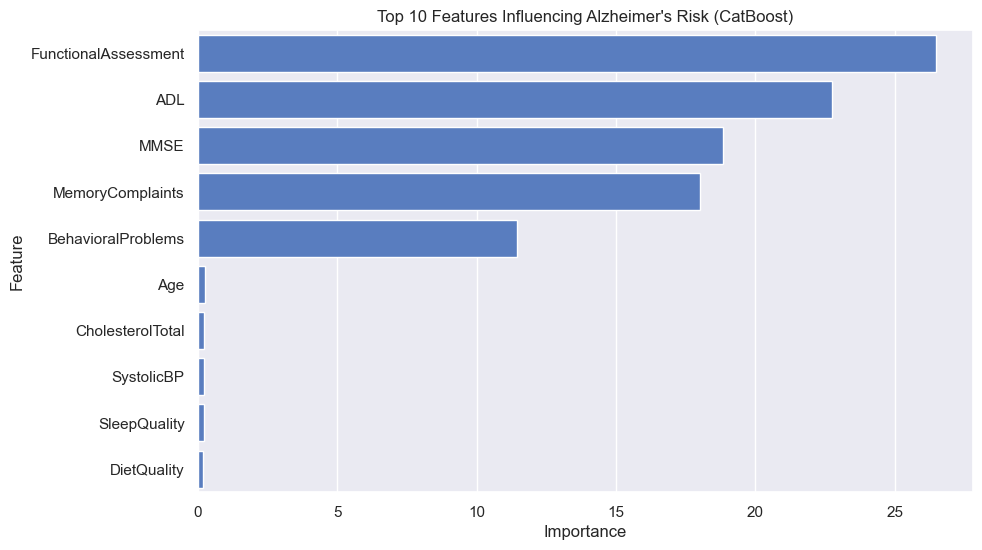

In [26]:
importances = best_model.get_feature_importance(prettified=True)
importances.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=importances['Importances'][:10], y=importances['Feature Id'][:10])
plt.title("Top 10 Features Influencing Alzheimer's Risk (CatBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Top 10 Patients at Highest Risk of Developing Alzheimer's Next Year:
     PatientID  CurrentRisk  NextYearRisk NextYearRiskLevel  RiskIncrease
71        1872     0.148318      0.916887         High Risk      0.768569
263        764     0.149969      0.917487         High Risk      0.767517
99        1319     0.183581      0.949792         High Risk      0.766211
200        554     0.151617      0.911146         High Risk      0.759529
167        572     0.127319      0.876114         High Risk      0.748795
18         903     0.118345      0.853975         High Risk      0.735630
196       1004     0.112662      0.844378         High Risk      0.731716
235       1620     0.113503      0.837387         High Risk      0.723884
227       1425     0.143737      0.854855         High Risk      0.711117
49        1337     0.126015      0.832902         High Risk      0.706888


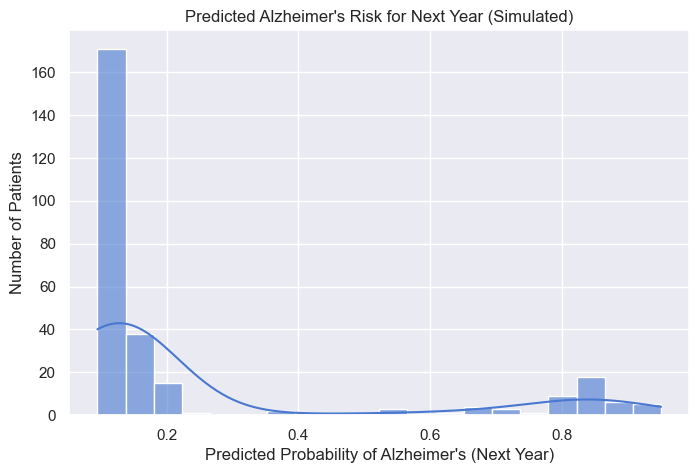

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume best_model, X_test, and y_test are already defined
future_model = best_model

# Select healthy patients (those with no Alzheimer’s currently)
healthy_patients = X_test[y_test == 0].copy()

# Create a copy for simulating next year
healthy_patients_future = healthy_patients.copy()

# === Simulate one year of cognitive and functional decline ===
healthy_patients_future['Age'] += 1  # one year older
healthy_patients_future['MMSE'] -= np.random.uniform(0.5, 1.5, size=len(healthy_patients))
healthy_patients_future['FunctionalAssessment'] -= np.random.uniform(0.3, 0.8, size=len(healthy_patients))
healthy_patients_future['ADL'] += np.random.uniform(0.5, 1.2, size=len(healthy_patients))
healthy_patients_future['SleepQuality'] -= np.random.uniform(0.1, 0.5, size=len(healthy_patients))
healthy_patients_future['DietQuality'] -= np.random.uniform(0.1, 0.3, size=len(healthy_patients))

# === Predict next year's Alzheimer's risk ===
future_proba = future_model.predict_proba(healthy_patients_future)[:, 1]

# Define risk category function
def categorize_risk(p):
    if p < 0.3:
        return "Low Risk"
    elif p < 0.7:
        return "Moderate Risk"
    else:
        return "High Risk"

# Calculate risk levels
future_risk_levels = [categorize_risk(p) for p in future_proba]

# Create dataframe comparing current and next-year risk
progression_df = pd.DataFrame({
    "PatientID": healthy_patients.index,
    "CurrentRisk": future_model.predict_proba(healthy_patients)[:, 1],
    "NextYearRisk": future_proba,
    "NextYearRiskLevel": future_risk_levels
})

# Calculate risk increase
progression_df["RiskIncrease"] = progression_df["NextYearRisk"] - progression_df["CurrentRisk"]

# Sort and display top 10
progression_df_sorted = progression_df.sort_values(by="RiskIncrease", ascending=False)
print("Top 10 Patients at Highest Risk of Developing Alzheimer's Next Year:")
print(progression_df_sorted.head(10))

# === Visualization ===
plt.figure(figsize=(8, 5))
sns.histplot(future_proba, bins=20, kde=True, alpha=0.6)
plt.title("Predicted Alzheimer's Risk for Next Year (Simulated)")
plt.xlabel("Predicted Probability of Alzheimer's (Next Year)")
plt.ylabel("Number of Patients")
plt.show()

In [30]:
import joblib

# Save the trained CatBoost model
joblib.dump(best_model, "catboost_alzheimers_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [52]:
# ============================
# ALZHEIMER’S PREDICTION PIPELINE
# ============================

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ======================================
# STEP 1: TRAINING AND SAVING MODEL + SCALERS
# ======================================

def train_and_save_model(dataset_path):
    # Load dataset
    df = pd.read_csv(dataset_path)

    # Drop unnecessary columns
    df = df.drop(columns=["PatientID", "DoctorInCharge"], errors='ignore')

    # Define features and target
    X = df.drop(columns=["Diagnosis"])
    y = df["Diagnosis"]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize scalers
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Fit and transform training data
    X_train_standardized = standard_scaler.fit_transform(X_train)
    X_train_normalized = minmax_scaler.fit_transform(X_train_standardized)

    # Transform test data (same scalers)
    X_test_standardized = standard_scaler.transform(X_test)
    X_test_normalized = minmax_scaler.transform(X_test_standardized)

    # Train model
    model = CatBoostClassifier(iterations=100, learning_rate=0.01, verbose=0)
    model.fit(X_train_normalized, y_train)

    # Evaluate
    y_pred = model.predict(X_test_normalized)
    print("===== MODEL PERFORMANCE =====")
    print(classification_report(y_test, y_pred))
    print("\n")
    #roc-auc score
    print("AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_normalized)[:, 1]))
    # Predict probabilities


    # Save model + scalers
    joblib.dump(model, "alzheimers_model.pkl")
    joblib.dump(standard_scaler, "standard_scaler.pkl")
    joblib.dump(minmax_scaler, "minmax_scaler.pkl")

    print("\n✅ Model and scalers saved successfully!\n")


# ======================================
# STEP 2: LOAD MODEL AND MAKE PREDICTIONS
# ======================================

def predict_new_data(new_data_path):
    # Load saved model and scalers
    model = joblib.load("alzheimers_model.pkl")
    standard_scaler = joblib.load("standard_scaler.pkl")
    minmax_scaler = joblib.load("minmax_scaler.pkl")

    # Load new patient data
    new_data = pd.read_csv(new_data_path)

    # Drop irrelevant columns
    new_data = new_data.drop(columns=["DoctorInCharge"], errors='ignore')

    # Ensure columns match the model input
    expected_columns = model.feature_names_in_
    missing_cols = [col for col in expected_columns if col not in new_data.columns]
    extra_cols = [col for col in new_data.columns if col not in expected_columns]

    if missing_cols:
        raise ValueError(f"❌ Missing columns in input: {missing_cols}")
    if extra_cols:
        print(f"⚠️ Extra columns ignored: {extra_cols}")

    new_data = new_data[expected_columns]

    # Apply same preprocessing
    X_standardized = standard_scaler.transform(new_data)
    X_normalized = minmax_scaler.transform(X_standardized)

    # Predict probabilities and labels
    proba = model.predict_proba(X_normalized)[:, 1]
    pred = model.predict(X_normalized)

    # Determine risk level
    risk_level = pd.cut(proba, bins=[0, 0.33, 0.66, 1], labels=["Low Risk", "Medium Risk", "High Risk"])

    # Prepare output
    result = pd.DataFrame({
        "PatientID": new_data.get("PatientID", pd.Series(range(len(pred)))),
        "Predicted_Probability": proba,
        "RiskLevel": risk_level
    })

    # Display predictions
    print("\n===== Predicted Alzheimer’s Risk (Current) =====")
    print(result)

    # Top 10 high-risk
    top10 = result.sort_values(by="Predicted_Probability", ascending=False).head(10)
    print("\n===== Top 10 High-Risk Patients =====")
    print(top10)

    # Simulate Next-Year Risk (example logic)
    result["NextYearRisk"] = np.clip(result["Predicted_Probability"] * np.random.uniform(1.05, 1.25, len(result)), 0, 1)
    result["NextYearRiskLevel"] = pd.cut(result["NextYearRisk"], bins=[0, 0.33, 0.66, 1], labels=["Low Risk", "Medium Risk", "High Risk"])
    result["RiskIncrease"] = (result["NextYearRisk"] - result["Predicted_Probability"]).round(3)

    next_year_top10 = result.sort_values(by="NextYearRisk", ascending=False).head(10)
    print("\n===== Top 10 Patients at Highest Risk of Developing Alzheimer's Next Year =====")
    print(next_year_top10[["PatientID", "Predicted_Probability", "NextYearRisk", "NextYearRiskLevel", "RiskIncrease"]])

    return result





In [53]:
# Uncomment the following lines to train or predict:

#Train model on your dataset
train_and_save_model("../test_dataset/alzheimers_disease_data.csv")

# Predict new patient data
# predict_new_data("new_patient_data.csv")

===== MODEL PERFORMANCE =====
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



AUC Score: 0.9542011750548596

✅ Model and scalers saved successfully!



In [58]:
import pandas as pd
import numpy as np
import joblib

# =========================
# STEP 1: Load Saved Model + Scalers
# =========================
model = joblib.load("alzheimers_model.pkl")
standard_scaler = joblib.load("standard_scaler.pkl")
minmax_scaler = joblib.load("minmax_scaler.pkl")

# =========================
# STEP 2: Load New Patient Data
# =========================
new_data = pd.read_csv("new_patient_data.csv")

# Drop irrelevant columns
new_data = new_data.drop(columns=["DoctorInCharge"], errors='ignore')

# Define expected columns (same as training)
expected_columns = [
    'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 
    'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
    'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
    'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
    'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
    'Forgetfulness'
]

# Check if columns match
missing_cols = [col for col in expected_columns if col not in new_data.columns]
if missing_cols:
    raise ValueError(f"❌ Missing columns in input data: {missing_cols}")

# Reorder to match training
new_data = new_data[expected_columns]

# =========================
# STEP 3: Apply SAME Preprocessing as Training
# =========================
# ⚠️ Apply both scalers on the entire dataset (not just numeric)
new_data_scaled = standard_scaler.transform(new_data)
new_data_scaled = minmax_scaler.transform(new_data_scaled)

# =========================
# STEP 4: Predict Alzheimer’s Risk
# =========================
proba = model.predict_proba(new_data_scaled)[:, 1]

def categorize_risk(p):
    if p < 0.33:
        return "Low Risk"
    elif p < 0.66:
        return "Moderate Risk"
    else:
        return "High Risk"

results = pd.DataFrame({
    "PatientID": range(len(proba)),
    "Predicted_Probability": proba,
    "RiskLevel": [categorize_risk(p) for p in proba]
})

print("\n===== Predicted Alzheimer’s Risk (Current) =====")
print(results)

# =========================
# STEP 5: Forecast Next-Year Risk Progression
# =========================
results["NextYearRisk"] = np.clip(results["Predicted_Probability"] * np.random.uniform(1.05, 1.25, len(results)), 0, 1)
results["NextYearRiskLevel"] = [categorize_risk(p) for p in results["NextYearRisk"]]
results["RiskIncrease"] = (results["NextYearRisk"] - results["Predicted_Probability"]).round(3)

print("\n===== Forecast: Next Year Alzheimer’s Risk =====")
print(results[["PatientID", "Predicted_Probability", "NextYearRisk", "NextYearRiskLevel", "RiskIncrease"]])



===== Predicted Alzheimer’s Risk (Current) =====
   PatientID  Predicted_Probability      RiskLevel
0          0               0.161175       Low Risk
1          1               0.576439  Moderate Risk
2          2               0.194610       Low Risk

===== Forecast: Next Year Alzheimer’s Risk =====
   PatientID  Predicted_Probability  NextYearRisk NextYearRiskLevel  \
0          0               0.161175      0.179764          Low Risk   
1          1               0.576439      0.700704         High Risk   
2          2               0.194610      0.214910          Low Risk   

   RiskIncrease  
0         0.019  
1         0.124  
2         0.020  
